# 2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
from IPython.display import display, Image

import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes(as_frame=True)
print(diabetes.keys())
print()
print(diabetes)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

{'data':           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.

In [3]:
diabetes['frame']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [4]:
# data = 입력값 target = 목표값 feature_name = 컬럼 이름, DESCR = 데이터셋 설명

In [5]:
print(diabetes['data'].shape)
diabetes['data']

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
print(diabetes['target'].shape)
diabetes['target']

(442,)


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [8]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
# diabetes['data'] 부분 데이터프레임화  (feature)
df_x = pd.DataFrame(data = diabetes['data'], columns=diabetes['feature_names'])
df_x        # 왜 다 실수...?

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [10]:
# diabetes['target'] 부분 데이터프레임화  (label)
df_y = pd.DataFrame(data = diabetes['target'])
df_y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [11]:
# ndarray화
X = diabetes['data'].values
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [12]:
# ndarray화
y = diabetes['target'].values
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [13]:
y1 = df_y.values
y1

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [14]:
# train test 데이터 분리  2:8비율
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=4)

In [15]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


In [16]:
# W값으로 랜덤한 10개의 값 생성 / b값으로 랜덤한 1개의 값 생성
W = np.random.rand(10)
b = np.random.rand()

In [17]:
W,b

(array([0.91846814, 0.76465736, 0.23403068, 0.05877663, 0.37105942,
        0.68689292, 0.78853213, 0.44899771, 0.72080455, 0.07483281]),
 0.33885574536169516)

In [18]:
def model(X,W,b):                  # 다변수 방정식
    pred = 0
    for i in range(10):
        pred += X[:,i] * W[i]
    pred += b
    return pred

In [19]:
# 모델 돌려보기
pred1 = model(X_train, W, b)
pred1

array([0.43394231, 0.50143451, 0.18715041, 0.46144784, 0.33552072,
       0.41554863, 0.27527884, 0.39226008, 0.36923814, 0.41286579,
       0.38269165, 0.25394975, 0.3842074 , 0.42128935, 0.06910533,
       0.17149173, 0.35135651, 0.17023839, 0.10453227, 0.15401109,
       0.27464218, 0.4879619 , 0.23611257, 0.34412021, 0.3084939 ,
       0.13551318, 0.17988635, 0.25834864, 0.45283471, 0.42088084,
       0.19962225, 0.39066357, 0.47240891, 0.40313643, 0.25018387,
       0.34802956, 0.45186026, 0.2578907 , 0.39591098, 0.42059525,
       0.24002918, 0.29525335, 0.42279636, 0.12715781, 0.1250315 ,
       0.29644773, 0.21601967, 0.38946314, 0.30568577, 0.31273879,
       0.28452093, 0.47842388, 0.21315922, 0.18316826, 0.55115831,
       0.5242083 , 0.28009612, 0.27096426, 0.34631686, 0.22755003,
       0.45626826, 0.32732992, 0.43910597, 0.27064918, 0.24290983,
       0.22477438, 0.41580334, 0.52961045, 0.36923048, 0.27239512,
       0.17155566, 0.65366507, 0.42745081, 0.22504106, 0.43077

In [20]:
# 오차의 제곱의 평균 구하기 (MSE)
def MSE(a, b):      # 정답 - 예측값
    mse = ((a - b) ** 2).mean()     # 두 값 차이 제곱의 평균
    return mse

In [21]:
# 손실값 구하기       모델로 돌린 값(예측값), 정답 데이터로 MSE 계산
def loss(X,W,b,y):
    pred = model(X,W,b)
    L = MSE(pred,y)
    return L

In [22]:
# 기울기 구하기
def gradient(X,W,b,y): 
    N = len(W)          # 가중치 갯수만큼의 길이
    
    y_pred = model(X,W,b)  # 예측값
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)   # W의 기울기     .T -> 행과 열의 구성을 서로 바꿔주는,,,?  .dot()은 행렬연산
    
    db = 2 * (y_pred - y).mean()   # x값이 안붙어서 따로 계산
    return dW, db

In [23]:
print(y.shape, y_train.shape)
print(y.T.shape, y_train.T.shape)

(442,) (353,)
(442,) (353,)


In [24]:
dW, db = gradient(X, W, b, y)
print('dW : ',dW)                  
print('dn : ',db)

dW :  [ -60.51432674  -13.73428612 -189.68425354 -142.71859258  -68.24978351
  -55.99799167  127.74466967 -139.06644086 -182.90383725 -123.59417589]
dn :  -303.5892568350685


In [25]:
LEARNING_RATE = 0.0001       # 학습률           적당한 값을 찾는건 어렵다고한다. 임의의 수를 넣어보고 조정하는 방식
# 수치가 낮을수록 더 많은 과정을 거치는것 같음

In [26]:
losses = []               # 손실함수 값 리스트

for i in range(1,60001):    # 1~1000
    dW, db = gradient(X_train, W, b, y_train)       # X_train, y_train 데이터와 임의로 추출했던 W, b 값으로 학습 / 경사값 추출
    W -= LEARNING_RATE * dW                         # 아직 무슨뜻인지는 두루뭉실하게 와닿음
    b -= LEARNING_RATE * db                         
    L = loss(X_train, W, b, y_train)                # 학습데이터의 손실함수
    losses.append(L)
    if i % 1000 == 0:                                 # 1000번째마다 출력
        print('학습횟수 %d : 손실값 %0.4f' % (i, L))

학습횟수 1000 : 손실값 21108.3869
학습횟수 2000 : 손실값 15803.6464
학습횟수 3000 : 손실값 12193.3978
학습횟수 4000 : 손실값 9724.4645
학습횟수 5000 : 손실값 8025.4625
학습횟수 6000 : 손실값 6846.9196
학습횟수 7000 : 손실값 6021.1360
학습횟수 8000 : 손실값 5435.2744
학습횟수 9000 : 손실값 5013.3182
학습횟수 10000 : 손실값 4703.9744
학습횟수 11000 : 손실값 4472.5601
학습횟수 12000 : 손실값 4295.5602
학습횟수 13000 : 손실값 4156.9759
학습횟수 14000 : 손실값 4045.8738
학습횟수 15000 : 손실값 3954.7396
학습횟수 16000 : 손실값 3878.3722
학습횟수 17000 : 손실값 3813.1400
학습횟수 18000 : 손실값 3756.4800
학습횟수 19000 : 손실값 3706.5601
학습횟수 20000 : 손실값 3662.0512
학습횟수 21000 : 손실값 3621.9730
학습횟수 22000 : 손실값 3585.5888
학습횟수 23000 : 손실값 3552.3343
학습횟수 24000 : 손실값 3521.7688
학습횟수 25000 : 손실값 3493.5411
학습횟수 26000 : 손실값 3467.3665
학습횟수 27000 : 손실값 3443.0099
학습횟수 28000 : 손실값 3420.2747
학습횟수 29000 : 손실값 3398.9939
학습횟수 30000 : 손실값 3379.0245
학습횟수 31000 : 손실값 3360.2426
학습횟수 32000 : 손실값 3342.5402
학습횟수 33000 : 손실값 3325.8225
학습횟수 34000 : 손실값 3310.0060
학습횟수 35000 : 손실값 3295.0163
학습횟수 36000 : 손실값 3280.7877
학습횟수 37000 : 손실값 3267.2611
학습횟수 38

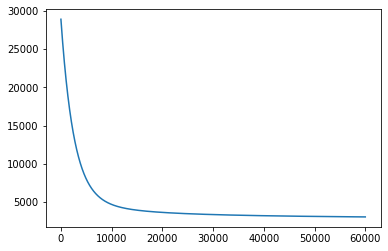

In [27]:
import matplotlib.pyplot as plt     # 그래프는 이쁜데... 어째서 손실값이 저 하늘에 있죠?
plt.plot(losses)
plt.show()

In [28]:
W, b

(array([  62.66944701, -127.50690548,  365.26174194,  271.2948176 ,
          10.90656018,  -41.9549492 , -180.45287609,  151.34175546,
         326.2686136 ,  127.85331755]),
 151.14959727982242)

In [29]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse                                

2977.953541491546

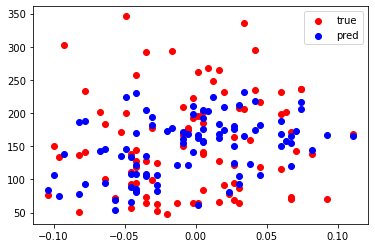

In [30]:
plt.scatter(X_test[:, 0], y_test, color='red', label='true')
plt.scatter(X_test[:, 0], prediction, color='blue', label='pred')
plt.legend()
plt.show()           

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model2 = LinearRegression()

In [32]:
model2.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model2.predict(X_test)
y_pred

array([ 74.43391835,  93.01109527, 174.89737143,  52.70087943,
       180.63167083, 145.29216855, 112.87572919, 121.31665469,
        86.80032197,  72.09378757, 106.45223905, 193.85629433,
       182.28244231, 125.44954596, 155.88807338, 139.16274427,
       176.97750299, 119.391544  , 110.71450134, 183.79586685,
       215.37201852, 181.15778329,  58.74605273, 228.82344172,
        54.2078642 , 107.86621435, 157.1596501 , 180.13320036,
        62.20538852,  67.18498305, 190.81938489, 118.09494234,
       260.89115016, 183.19864659, 105.60921861, 175.91776536,
       176.89214476, 156.04517274, 146.9267604 , 157.34264891,
       198.17580795, 168.02789586, 237.98697647,  71.33866228,
       237.45207957, 108.07352281, 152.11732859,  50.30628893,
       199.55743787, 139.52692004, 110.45619532, 101.52014142,
       154.91606348, 228.90426313,  54.52750793, 187.29002271,
       106.15579971,  93.61499106, 190.00654826, 226.40047522,
       124.53876748,  97.0908313 , 168.71526129, 249.76

In [34]:
mse = mean_squared_error(y_test, y_pred)
mse

2939.4160466455023

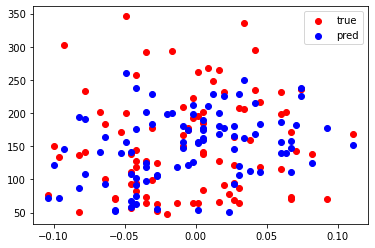

In [35]:
plt.scatter(X_test[:, 0], y_test, color='red', label='true')
plt.scatter(X_test[:, 0], y_pred, color='blue', label='pred')
plt.legend()
plt.show()   

이상하게 25번 라인에서 'operands could not be broadcast together with shapes'에러가 뜨길래 검색을 해봤지만 조금 난해하게 해석이 되어있어
멋대로 해석해보았다. 무언가 행과 열이 맞지않아 생긴 오류라는 느낌이 들어 처음부터 천천히 뜯어보았다.

그 결과 처음 데이터를 분리할때 13번 라인의 y = df_y.values 라는 부분이 눈에 들어왔고, 강의를 보면서 쌓았던 코드와는 조금 달랐다는걸 보았다.
y = diabetes['target'] 으로 바꾸니 정상작동되었고, 두 코드를 비교해보니 '데이터프레임'화 시킨 타겟에서 추출하는 과정이
행렬의 모양에 영향이 있는 것 같다.(1차원, 2차원)

25번 line의 학습률을 이리저리 만져보니 확실히 수치가 더 작아질수록 학습 과정이 느리다는것을 알 수 있었고, 덧붙여 손실값(학습진행률)의
감소 속도의 차이도 확인 할 수 있었다.
학습률을 0.001로 하면 그나마 로지스틱회귀와 결과값이 비슷하지만 학습 속도가 빠르고
학습률을 0.0001로 하면 학습속도는 적절하지만 결과값이 기대 이상으로 내려가지 않았다. -> 반복 횟수를 늘리니 내려가긴 한다!

전체적인 흐름을 어느정도 이해하게되어 특별히 구글링 등 다른 자료를 찾아보거나 하지 않았어도 진행 할 수 있었고,
그 과정이 무척 흥미롭게 다가왔다.

# 2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [36]:
from IPython.display import display, Image

import pandas as pd
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

(1) 데이터 가져오기

In [37]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [39]:
train['datetime'] = pd.to_datetime(train['datetime'])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [41]:
year = train['datetime'].dt.year
month = train['datetime'].dt.month
day = train['datetime'].dt.day
hour = train['datetime'].dt.hour
min = train['datetime'].dt.minute
sec = train['datetime'].dt.second
dayofweek = train['datetime'].dt.dayofweek

In [42]:
train['year'] = year
train['month'] = month
train['day'] = day
train['hour'] = hour
train['minute'] = min
train['second'] = sec
train['dayofweek'] = dayofweek

In [43]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


여러 요소 확인해보기

In [44]:
print(train['second'].unique())
print(train['minute'].unique())
print(train['day'].unique())
print(train['weather'].unique())
train['dayofweek'].unique()

[0]
[0]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[1 2 3 4]


array([5, 6, 0, 1, 2, 3, 4])

minute, second 컬럼은 모두 0으로 채워짐

day 컬럼은 1~19까지만 있음

weather은 4가지로 분류됨

dayofweek는 0월 1화 2수 3목 4금 5토 6일

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

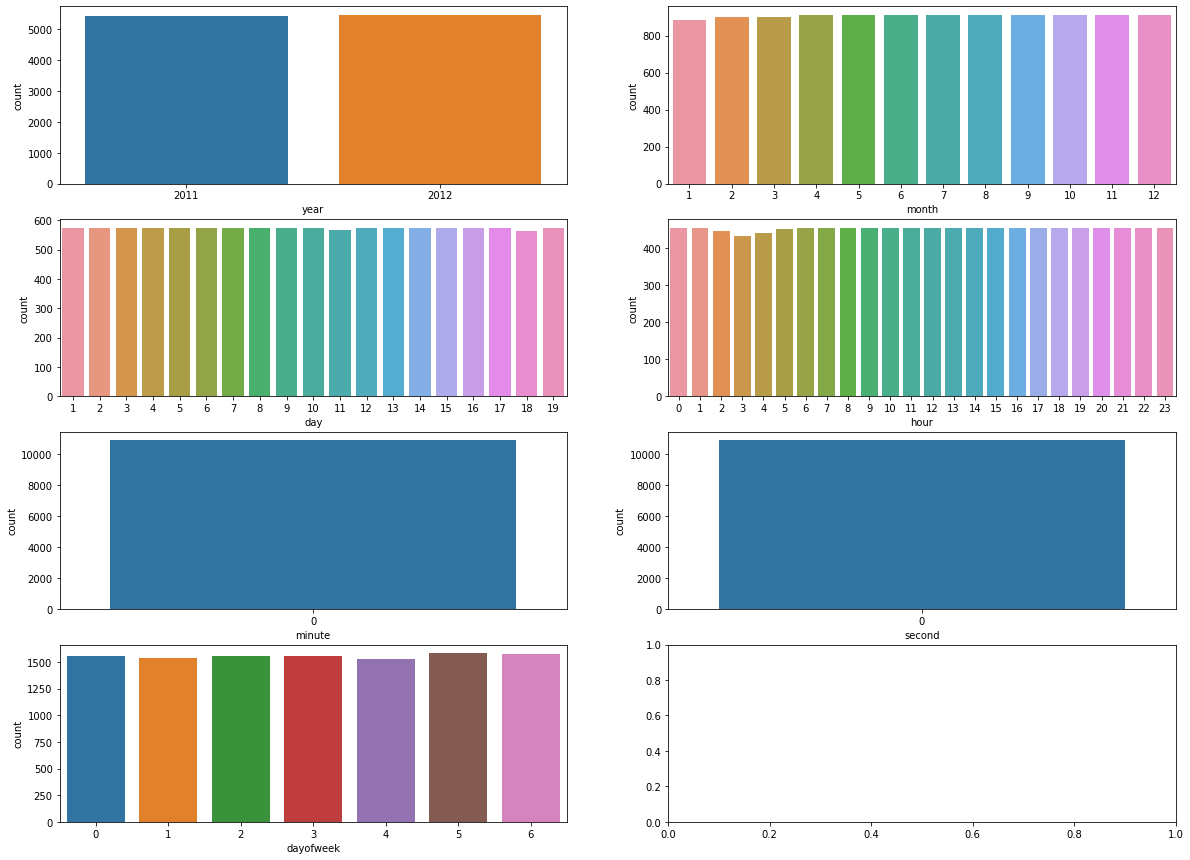

In [45]:
# Exploration 3 시각화 부분 참고해서 만든 그래프입니다.
fig, ax = plt.subplots(4, 2, figsize=(20, 15))

ax1 = sns.countplot(x='year', data=train, ax=ax[0,0])
ax2 = sns.countplot(x='month', data=train, ax=ax[0,1])
ax3 = sns.countplot(x='day', data=train, ax=ax[1,0])
ax4 = sns.countplot(x='hour', data=train, ax=ax[1,1])
ax5 = sns.countplot(x='minute', data=train, ax=ax[2,0])
ax6 = sns.countplot(x='second', data=train, ax=ax[2,1])
ax7 = sns.countplot(x='dayofweek', data=train, ax=ax[3,0])

정만 안이쁘게 만들어졌다,,,, 왜 다 수치는 비슷한걸까


# (4) X, y 컬럼 선택 및 train/test 데이터 분리

데이터 예측 목적이 날씨, 요일, 시간 을 토대로 이용 량이므로

In [46]:
X = train[['weather', 'dayofweek', 'hour']].values

In [47]:
X

array([[ 1,  5,  0],
       [ 1,  5,  1],
       [ 1,  5,  2],
       ...,
       [ 1,  2, 21],
       [ 1,  2, 22],
       [ 1,  2, 23]])

In [48]:
y = train['count'].values
y

array([ 16,  40,  32, ..., 168, 129,  88])

In [49]:
X.shape, y.shape

((10886, 3), (10886,))

데이터 나누기

In [50]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=3)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 3) (8708,)
(2178, 3) (2178,)


# (5) LinearRegression 모델 학습

위에서 이미 import 했으니 바로 진행

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_test)
y_pred

array([177.32884614, 128.37260376, 305.48780268, ..., 145.8381102 ,
       171.24845485,  96.43776624])

MSE RMSE 구하기

In [54]:
mse = mean_squared_error(y_test, y_pred)
mse

27071.458494561983

In [55]:
rmse = mse ** 0.5
rmse

164.53406484543552

In [56]:
train['temp'].values

array([ 9.84,  9.02,  9.02, ..., 13.94, 13.94, 13.12])

In [57]:
train['humidity'].values

array([81, 80, 80, ..., 61, 61, 66])

In [58]:
train['count'].values

array([ 16,  40,  32, ..., 168, 129,  88])

In [59]:
temp_count = train['count'].groupby(train['temp']).sum()

In [60]:
humidity_count = train['count'].groupby(train['humidity']).sum()

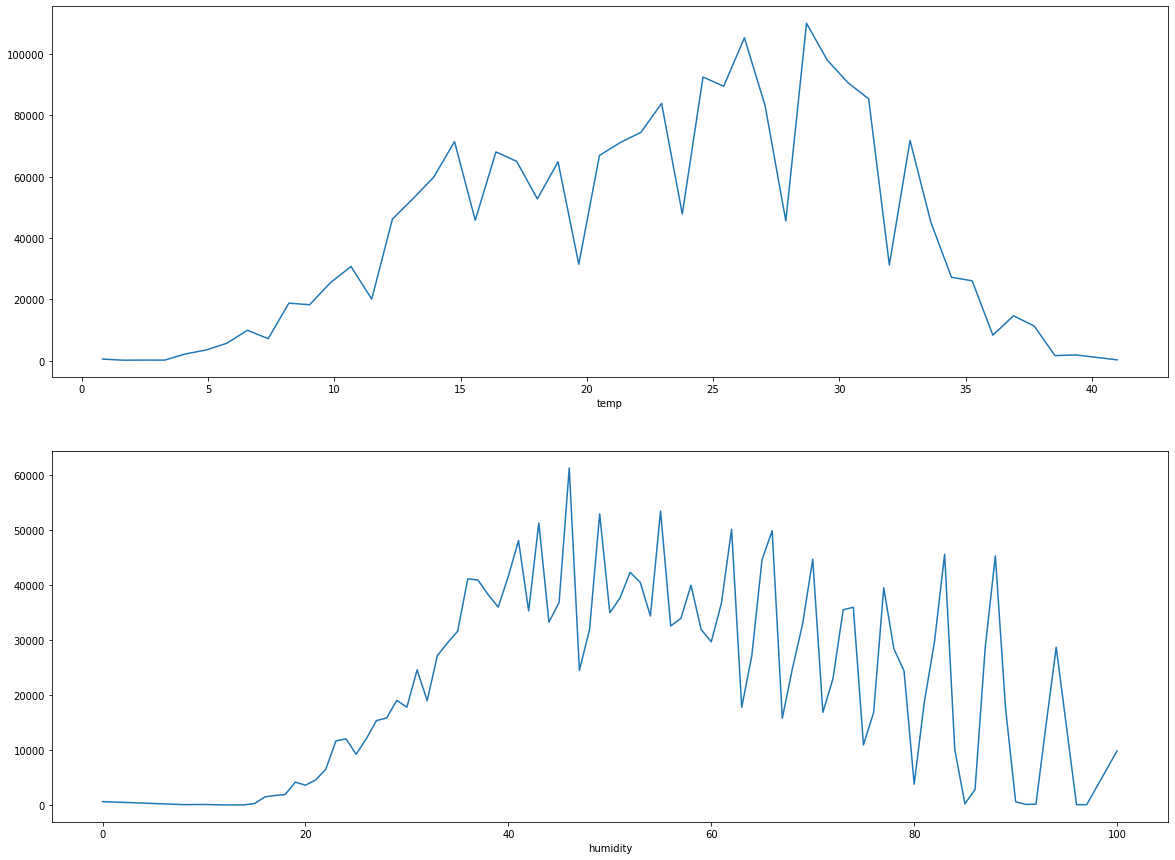

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15))

temp_count.plot(ax=ax[0])
humidity_count.plot(ax=ax[1])


plt.show()


# 음,,,,,, 시각화는 잘 모르겠어요,,,

뭔가를 찾아서 다른 형식의 그래프를 넣어봐도 적용이 잘 안되네요ㅠㅠㅜ 아직 이해가 덜되었나봅니다  
일단은 11/9에 배운 데이터분석쪽 노드를 참고로하여 그래프를 완성시켜보았습니다.  
각각 그래프의 x,y는 제대로 찾아갔고 모양은 그럴싸한데 고슴도치마냥 가시가 많네요  
시각화쪽 공부가 더 필요해 보입니다,,,,